In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
X_train=pd.read_csv(r'C:\Users\C-ROAD\Desktop\DetectionDataset_train.csv')
x_test=pd.read_csv(r'C:\Users\C-ROAD\Desktop\DetectionDataset_test.csv')
y_train=pd.read_csv(r'C:\Users\C-ROAD\Desktop\DetectionLabel_train.csv')
y_test=pd.read_csv(r'C:\Users\C-ROAD\Desktop\DetectionLabel_test.csv')

In [3]:
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

In [4]:
knn_pipeline= Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', IncrementalPCA(n_components=10)),
    ('knn', KNeighborsClassifier(algorithm='auto',n_neighbors=5,weights='distance'))
])


In [5]:
knn_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', IncrementalPCA(n_components=10)),
                ('knn', KNeighborsClassifier(weights='distance'))])

In [6]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [7]:
scores = cross_val_score(knn_pipeline, X_train, y_train, cv=5, scoring='precision_weighted')

In [8]:
scores

array([0.99721405, 0.99708273, 0.99712476, 0.99702812, 0.99725328])

In [9]:
scores.mean()

0.9971405865561411

In [10]:
knn_pipeline_manhaten= Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', IncrementalPCA(n_components=10)),
    ('knn', KNeighborsClassifier(algorithm='auto',n_neighbors=5,metric='manhattan',weights='distance'))
])

In [11]:
knn_pipeline_manhaten.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', IncrementalPCA(n_components=10)),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', weights='distance'))])

In [12]:
scores_manhaten = cross_val_score(knn_pipeline_manhaten, X_train, y_train, cv=5, scoring='precision')
scores_manhaten

array([0.99231786, 0.9915695 , 0.99169585, 0.99129833, 0.99225944])

In [13]:
scores_manhaten.mean()

0.9918281978483989

In [14]:
knn_pipeline_Euclidean= Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', IncrementalPCA(n_components=10)),
    ('knn', KNeighborsClassifier(algorithm='auto',n_neighbors=5,metric='euclidean',weights='distance'))
])

In [15]:
knn_pipeline_Euclidean.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', IncrementalPCA(n_components=10)),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', weights='distance'))])

In [16]:
scores_euc = cross_val_score(knn_pipeline_manhaten, X_train, y_train, cv=5, scoring='precision')
scores_euc

array([0.99231786, 0.9915695 , 0.99169585, 0.99129833, 0.99225944])

In [17]:
scores_euc.mean()

0.9918281978483989

In [18]:
knn_manh = knn_pipeline.named_steps['knn']
knn_manh.algorithm

'auto'

In [19]:
knn = knn_pipeline.named_steps['knn']
knn.algorithm

'auto'

In [6]:
scores = cross_val_score(knn_pipeline, x_test, y_test, cv=5, scoring='precision_weighted')
scores

array([0.99634032, 0.99630314, 0.99621175, 0.99666347, 0.99643313])

In [7]:
scores.mean()

0.9963903627846953

In [8]:
scores.std()

0.0001539017499844697

In [12]:
crossVal_predic = cross_val_predict(knn_pipeline,
x_test, y_test, cv=5)

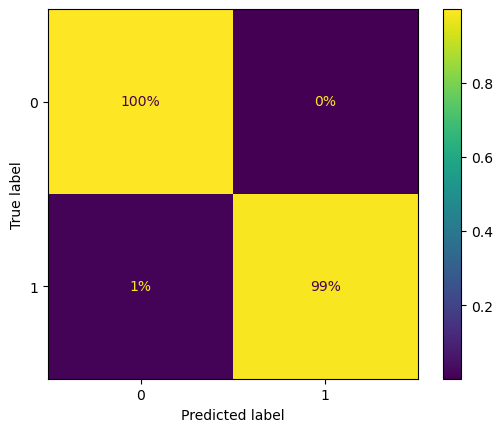

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test,
crossVal_predic,normalize="true", values_format=".0%")
plt.show()

In [16]:
y_scores2 = cross_val_predict(knn_pipeline, x_test, y_test, cv=5, method='predict_proba')

In [17]:
y_scores_positive = y_scores2[:, 1]

In [18]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_positive)

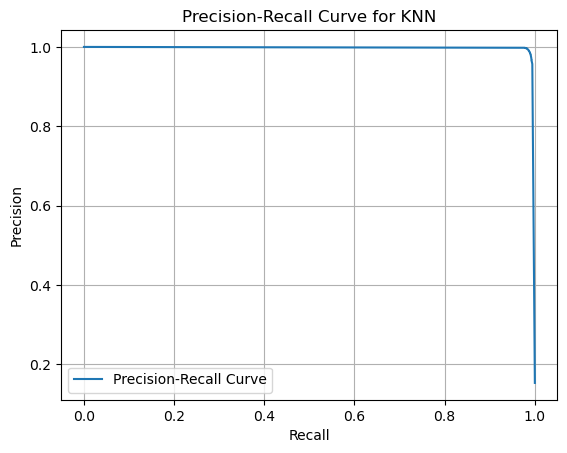

In [19]:
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for KNN')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
y_scores = knn_pipeline.predict_proba(x_test)

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

In [23]:
roc_auc = auc(fpr, tpr)

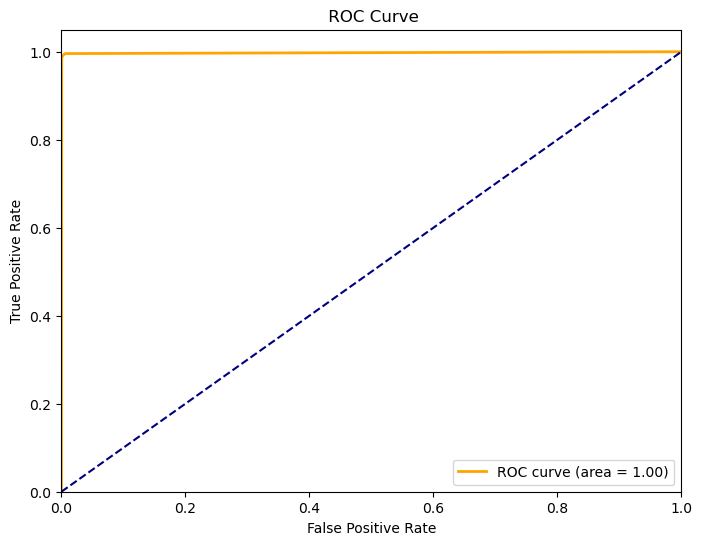

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC Curve')
plt.legend(loc="lower right")
plt.show()